# Telecom Churn - Case Study by Hari and Krishna

## Problem Statement


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing oneretaining high profitable customers is the number one business goal.

## Outcome of this Case Study

1. Analyse customer-level data of a leading telecom firm
2. Build predictive models to identify customers at high risk of churn
3. Identify the main indicators of churn
4. Predict which customers are at high risk of churn on the 9th Month from the given data.

## Scope of churn for this Case Study

Usage-based churn: 
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

High-value Churn:
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

### Data Understanding 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#import data into DataFrame

telecom_churn_rawdata_df = pd.read_csv('telecom_churn_data.csv')

In [3]:
telecom_churn_rawdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
telecom_churn_rawdata_df.shape

(99999, 226)

In [5]:
telecom_churn_rawdata_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Data Preparation

In [6]:
#Remove Null values which are empty by more than 60%
null_values = telecom_churn_rawdata_df.isnull().sum()
listofNull = list(null_values[null_values>(len(telecom_churn_rawdata_df.mobile_number)*60/100)].index)
print(len(listofNull))

40


In [7]:
telecom_churn_reduced_1_df = telecom_churn_rawdata_df.drop(listofNull, axis =1)

In [8]:
telecom_churn_reduced_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 141.9+ MB


In [9]:
pd.set_option('display.max_columns', None)
telecom_churn_reduced_1_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0

### Filtering high value customers

In [10]:
telecom_churn_reduced_1_df.shape

(99999, 186)

In [11]:
# As described in the problem statement, filtering the rows which are high value customers based on their good phase 
telecom_churn_reduced_1_df['good_phase_revenue'] = (telecom_churn_reduced_1_df['total_rech_amt_6'] + telecom_churn_reduced_1_df['total_rech_amt_7'])/2
telecom_churn_reduced_1_df = telecom_churn_reduced_1_df[telecom_churn_reduced_1_df['good_phase_revenue'] > telecom_churn_reduced_1_df['good_phase_revenue'].quantile(0.70)]

In [12]:

telecom_churn_reduced_1_df.shape

(29979, 187)

#### Conclusion:  As expected the number of rows after filtering should be 29,000 rows.

### Tagging Churn customers 

In [13]:
telecom_churn_reduced_1_df['total_usage_col'] = telecom_churn_reduced_1_df['total_og_mou_9'] + telecom_churn_reduced_1_df['total_ic_mou_9'] + telecom_churn_reduced_1_df['vol_2g_mb_9'] + telecom_churn_reduced_1_df['vol_3g_mb_9']

In [14]:
telecom_churn_reduced_1_df['churn'] = telecom_churn_reduced_1_df.total_usage_col.apply(lambda x: 1 if x == 0 else 0)

In [15]:
numberofchurn = telecom_churn_reduced_1_df.churn.sum()

In [16]:
#calculate percentage of churn 

(numberofchurn/len(telecom_churn_reduced_1_df.churn))*100

8.636045231662164

#### Conclusion: there is overall churn possibility of 8.6%

### Dropping columns which are not Insignificant

In [17]:
# Drop list of columns with _9 as we already created the churn data for it

_9_col = [x for x in telecom_churn_reduced_1_df.columns if '_9' in x]
telecom_churn_reduced_2_df = telecom_churn_reduced_1_df.drop(_9_col, axis = 1)

In [18]:
telecom_churn_reduced_2_df.shape

(29979, 145)

In [19]:
#dropping the columns used for filtering and tagging 

Inter_columns = ['good_phase_revenue', 'total_usage_col']
telecom_churn_reduced_2_df = telecom_churn_reduced_2_df.drop(Inter_columns, axis = 1)

In [20]:
telecom_churn_reduced_2_df.shape

(29979, 143)

In [21]:
telecom_churn_reduced_2_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0

In [22]:
# lets remove columns which are not significant 

Insignificant_col = ['mobile_number','circle_id', 'last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8' ]
telecom_churn_reduced_2_df = telecom_churn_reduced_2_df.drop(Insignificant_col, axis = 1)
telecom_churn_reduced_2_df.shape

(29979, 138)

### Treating missing values

In [23]:
#Analyse columns with Null values
null_values = telecom_churn_reduced_2_df.isnull().sum()
listofNull = list(null_values[null_values>0].index)
print(len(listofNull))

93


In [24]:
#lets see how many values are missing, based on that lets take a call on whether to impute or to delete it 
before_droppingrows = telecom_churn_reduced_2_df.shape[0]
telecom_churn_reduced_3_df = telecom_churn_reduced_2_df.dropna(axis = 0)
after_droppingrows = telecom_churn_reduced_3_df.shape[0]

In [25]:
# % of rows removed 
print(((before_droppingrows - after_droppingrows)/before_droppingrows)*100)

5.083558490943661


In [26]:
#lets see if any more columns with Null values are present 
null_values = telecom_churn_reduced_3_df.isnull().sum()
listofNull = list(null_values[null_values>0].index)
print(len(listofNull))

0


#### Conclusion : Only 5% of the overall data is removed. so its ok to remove the rows with empty values as they dont add much value

### Find list of columns which has only one unique value. which can hence be removed.

In [27]:
Listofcolumns  = list(telecom_churn_reduced_3_df.columns)
Columnstoberemoved_L = []
for each in Listofcolumns:
    if len(telecom_churn_reduced_3_df.loc[:, each].unique()) == 1:
            Columnstoberemoved_L.append(each)
        
telecom_churn_reduced_4_df = telecom_churn_reduced_3_df.drop(Columnstoberemoved_L, axis =1)
telecom_churn_reduced_4_df.shape

(28455, 129)

In [28]:
telecom_churn_reduced_4_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,6/20/2014,7/22/2014,8/30/2014,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83

### Creating Derived Metrics 

In [29]:
telecom_churn_reduced_5_df = telecom_churn_reduced_4_df

In [30]:
#Calculate Date from last day of the month for recharge 
telecom_churn_reduced_5_df['Recharge_on_days_before_EOM_6'] = telecom_churn_reduced_5_df.date_of_last_rech_6.apply(lambda x: (30 - int(x.split('/')[1])))
telecom_churn_reduced_5_df['Recharge_on_days_before_EOM_7'] = telecom_churn_reduced_5_df.date_of_last_rech_7.apply(lambda x: (31 - int(x.split('/')[1])))
telecom_churn_reduced_5_df['Recharge_on_days_before_EOM_8'] = telecom_churn_reduced_5_df.date_of_last_rech_8.apply(lambda x: (31 - int(x.split('/')[1])))

In [31]:
# Remove date time columns as its not needed

telecom_churn_reduced_5_df = telecom_churn_reduced_5_df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis = 1)

In [32]:
telecom_churn_reduced_5_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28455 entries, 7 to 99997
Columns: 129 entries, arpu_6 to Recharge_on_days_before_EOM_8
dtypes: float64(100), int64(29)
memory usage: 28.2 MB


#### Conclusion: Now we have all numerical columns

In [33]:
telecom_churn_reduced_5_df.shape

(28455, 129)

#### Combining 6,7 columns as forming them as a good phase

In [34]:
telecom_churn_reduced_5_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,Recharge_on_days_before_EOM_6,Recharge_on_days_before_EOM_7,Recharge_on_days_before_EOM_8
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,3,6,5
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,5,0,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,0,10,9,1
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,2

In [35]:
def average_func(x):
    telecom_churn_reduced_5_df[x+'_good'] = (telecom_churn_reduced_5_df[x+'_6'] + telecom_churn_reduced_5_df[x+'_7'])/2
    

In [36]:
average_func('arpu')
average_func('onnet_mou')
average_func('offnet_mou')
average_func('roam_ic_mou')
average_func('roam_og_mou')
average_func('loc_og_t2t_mou')
average_func('loc_og_t2m_mou')
average_func('loc_og_t2f_mou')
average_func('loc_og_t2c_mou')
average_func('loc_og_mou')
average_func('std_og_t2t_mou')
average_func('std_og_t2m_mou')
average_func('std_og_t2f_mou')
average_func('std_og_mou')
average_func('isd_og_mou')
average_func('spl_og_mou')
average_func('og_others')
average_func('total_og_mou')
average_func('loc_ic_t2t_mou')
average_func('loc_ic_t2m_mou')
average_func('loc_ic_t2f_mou')
average_func('loc_ic_mou')
average_func('std_ic_t2t_mou')
average_func('std_ic_t2m_mou')
average_func('std_ic_t2f_mou')
average_func('std_ic_mou')
average_func('total_ic_mou')
average_func('spl_ic_mou')
average_func('isd_ic_mou')
average_func('ic_others')
average_func('total_rech_num')
average_func('total_rech_amt')
average_func('max_rech_amt')
average_func('last_day_rch_amt')
average_func('vol_2g_mb')
average_func('vol_3g_mb')
average_func('monthly_2g')
average_func('sachet_2g')
average_func('monthly_3g')
average_func('sachet_3g')
average_func('Recharge_on_days_before_EOM')


In [37]:
telecom_churn_reduced_5_df.shape

(28455, 170)

In [38]:
#drop columns with _6 and _7

_6_7_col = [x for x in telecom_churn_reduced_5_df.columns if '_6' in x]
telecom_churn_reduced_6_df = telecom_churn_reduced_5_df.drop(_6_7_col, axis = 1)

_6_7_col = [x for x in telecom_churn_reduced_5_df.columns if '_7' in x]
telecom_churn_reduced_6_df = telecom_churn_reduced_6_df.drop(_6_7_col, axis = 1)

In [39]:
telecom_churn_reduced_6_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,Recharge_on_days_before_EOM_8,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,Recharge_on_days_before_EOM_good
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.0,1,5,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,4.5
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,315,21.03,910.65,122.16,0.0,0,1,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.00,0.00,0.000,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,178.0,375.475,0.5,0.5,0.0,0.0,2.5
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.00,0,3,0,0,2607,0.00,0.00,0.00,0.0,0,1,349.2585,305.075,266.295,83.885,21.620,27.910,99.205,2.270,0.0,129.395,266.195,154.150,0.00,420.355,0.00,0.00,0.000,549.750,37.730,80.705,2.405,120.845,76.985,168.960,0.000,245.950,570.595,0.225,153.695,49.860,5.0,380.0,110.0,80.0,0.0,0.000,0.0,0.0,0.0,0.0,9.5
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.00,0,0,0,0,511,0.00,2.45,21.89,0.0,0,17,365.4220,62.260,263.015,1.415,8.870,53.885,209.640,2.240,0.0,265.775,5.235,43.750,0.00,48.990,0.00,1.63,0.000,316.410,56.385,188.250,8.695,253.345,73.715,45.880,0.255,119.860,373.210,0.000,0.000,0.000,8.0,459.0,110.0,100.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.00,0,0,0,0,667,0.00,0.00,0.00,0.0,0,6,354.4940,597.595,30.820,2.380,4.230,19.495,29.270,0.000,0.0,48.770,573.860,0.775,0.00,574.635,0.00,1.29,0.465,625.170,17.270,24.860,0.000,42.135,4.315,0.640,0.000,4.955,47.095,0.000,0.000,0.000,10.5,408.0,55.0,15.0,0.0,0.000,0.0,0.0,0.0,0.0,0.5


In [40]:
#vbc_3g column doesnt maintain the proper naming convention so lets change that
telecom_churn_reduced_6_df['vbc_3g_good'] = (telecom_churn_reduced_6_df['jun_vbc_3g'] + telecom_churn_reduced_5_df['jul_vbc_3g'])/2
telecom_churn_reduced_6_df['vbc_3g_8'] = telecom_churn_reduced_6_df['aug_vbc_3g']

In [41]:
#drop columns corresponding to vbc

telecom_churn_reduced_7_df = telecom_churn_reduced_6_df.drop(['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g'], axis=1)

In [42]:
telecom_churn_reduced_7_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,Recharge_on_days_before_EOM_8,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,Recharge_on_days_before_EOM_good,vbc_3g_good,vbc_3g_8
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,802,1,5,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,4.5,19.060,57.74
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,315,0,1,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.00,0.00,0.000,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,178.0,375.475,0.5,0.5,0.0,0.0,2.5,516.405,21.03
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.00,0,3,0,0,2607,0,1,349.2585,305.075,266.295,83.885,21.620,27.910,99.205,2.270,0.0,129.395,266.195,154.150,0.00,420.355,0.00,0.00,0.000,549.750,37.730,80.705,2.405,120.845,76.985,168.960,0.000,245.950,570.595,0.225,153.695,49.860,5.0,380.0,110.0,80.0,0.0,0.000,0.0,0.0,0.0,0.0,9.5,0.000,0.00
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.00,0,0,0,0,511,0,17,365.4220,62.260,263.015,1.415,8.870,53.885,209.640,2.240,0.0,265.775,5.235,43.750,0.00,48.990,0.00,1.63,0.000,316.410,56.385,188.250,8.695,253.345,73.715,45.880,0.255,119.860,373.210,0.000,0.000,0.000,8.0,459.0,110.0,100.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,12.170,0.00
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.00,0,0,0,0,667,0,6,354.4940,597.595,30.820,2.380,4.230,19.495,29.270,0.000,0.0,48.770,573.860,0.775,0.00,574.635,0.00,1.29,0.465,625.170,17.270,24.860,0.000,42.135,4.315,0.640,0.000,4.955,47.095,0.000,0.000,0.000,10.5,408.0,55.0,15.0,0.0,0.000,0.0,0.0,0.0,0.0,0.5,0.000,0.00


In [43]:
telecom_churn_reduced_7_df.shape

(28455, 86)

In [44]:
# Calculate % difference in behaviour between good and action(8) phase

In [45]:
def Percent_diff_func(x):
    telecom_churn_reduced_7_df[x+'_action_good_perct_diff'] = round((((telecom_churn_reduced_7_df[x+'_8'] - telecom_churn_reduced_7_df[x+'_good'])/telecom_churn_reduced_7_df[x+'_good'])*100),2)
    telecom_churn_reduced_7_df[x+'_action_good_perct_diff'] = telecom_churn_reduced_7_df[x+'_action_good_perct_diff'].astype('str')
    telecom_churn_reduced_7_df[x+'_action_good_perct_diff'] = telecom_churn_reduced_7_df[x+'_action_good_perct_diff'].apply(lambda x : '0' if x == 'inf' else x )
    telecom_churn_reduced_7_df[x+'_action_good_perct_diff'] = telecom_churn_reduced_7_df[x+'_action_good_perct_diff'].apply(lambda x : '0' if x == 'nan' else x )
    telecom_churn_reduced_7_df[x+'_action_good_perct_diff'] = telecom_churn_reduced_7_df[x+'_action_good_perct_diff'].astype('float')

In [46]:
Percent_diff_func('arpu')
Percent_diff_func('onnet_mou')
Percent_diff_func('offnet_mou')
Percent_diff_func('roam_ic_mou')
Percent_diff_func('roam_og_mou')
Percent_diff_func('loc_og_t2t_mou')
Percent_diff_func('loc_og_t2m_mou')
Percent_diff_func('loc_og_t2f_mou')
Percent_diff_func('loc_og_t2c_mou')
Percent_diff_func('loc_og_mou')
Percent_diff_func('std_og_t2t_mou')
Percent_diff_func('std_og_t2m_mou')
Percent_diff_func('std_og_t2f_mou')
Percent_diff_func('std_og_mou')
Percent_diff_func('isd_og_mou')
Percent_diff_func('spl_og_mou')
Percent_diff_func('og_others')
Percent_diff_func('total_og_mou')
Percent_diff_func('loc_ic_t2t_mou')
Percent_diff_func('loc_ic_t2m_mou')
Percent_diff_func('loc_ic_t2f_mou')
Percent_diff_func('loc_ic_mou')
Percent_diff_func('std_ic_t2t_mou')
Percent_diff_func('std_ic_t2m_mou')
Percent_diff_func('std_ic_t2f_mou')
Percent_diff_func('std_ic_mou')
Percent_diff_func('total_ic_mou')
Percent_diff_func('spl_ic_mou')
Percent_diff_func('isd_ic_mou')
Percent_diff_func('ic_others')
Percent_diff_func('total_rech_num')
Percent_diff_func('total_rech_amt')
Percent_diff_func('max_rech_amt')
Percent_diff_func('last_day_rch_amt')
Percent_diff_func('vol_2g_mb')
Percent_diff_func('vol_3g_mb')
Percent_diff_func('monthly_2g')
Percent_diff_func('sachet_2g')
Percent_diff_func('monthly_3g')
Percent_diff_func('sachet_3g')
Percent_diff_func('Recharge_on_days_before_EOM')
Percent_diff_func('vbc_3g')

In [47]:
telecom_churn_reduced_8_df = telecom_churn_reduced_7_df

In [48]:
telecom_churn_reduced_8_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,Recharge_on_days_before_EOM_8,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,Recharge_on_days_before_EOM_good,vbc_3g_good,vbc_3g_8,arpu_action_good_perct_diff,onnet_mou_action_good_perct_diff,offnet_mou_action_good_perct_diff,roam_ic_mou_action_good_perct_diff,roam_og_mou_action_good_perct_diff,loc_og_t2t_mou_action_good_perct_diff,loc_og_t2m_mou_action_good_perct_diff,loc_og_t2f_mou_action_good_perct_diff,loc_og_t2c_mou_action_good_perct_diff,loc_og_mou_action_good_perct_diff,std_og_t2t_mou_action_good_perct_diff,std_og_t2m_mou_action_good_perct_diff,std_og_t2f_mou_action_good_perct_diff,std_og_mou_action_good_perct_diff,isd_og_mou_action_good_perct_diff,spl_og_mou_action_good_perct_diff,og_others_action_good_perct_diff,total_og_mou_action_good_perct_diff,loc_ic_t2t_mou_action_good_perct_diff,loc_ic_t2m_mou_action_good_perct_diff,loc_ic_t2f_mou_action_good_perct_diff,loc_ic_mou_action_good_perct_diff,std_ic_t2t_mou_action_good_perct_diff,std_ic_t2m_mou_action_good_perct_diff,std_ic_t2f_mou_action_good_perct_diff,std_ic_mou_action_good_perct_diff,total_ic_mou_action_good_perct_diff,spl_ic_mou_action_good_perct_diff,isd_ic_mou_action_good_perct_diff,ic_others_action_good_perct_diff,total_rech_num_action_good_perct_diff,total_rech_amt_action_good_perct_diff,max_rech_amt_action_good_perct_diff,last_day_rch_amt_action_good_perct_diff,vol_2g_mb_action_good_perct_diff,vol_3g_mb_action_good_perct_diff,monthly_2g_action_good_perct_diff,sachet_2g_action_good_perct_diff,monthly_3g_action_good_perct_diff,sachet_3g_action_good_perct_diff,Recharge_on_days_before_EOM_action_good_perct_diff,vbc_3g_action_good_perct_diff
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,802,1,5,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,4.5,19.060,57.74,162.21,-7.06,-36.13,27.27,109.52,-2.67,-57.07,-9.22,0.0,-46.49,-12.94,20.37,24.76,14.47,11022.22,188.89,0.0,-36.15,-39.58,-44.79,-68.83,-51.98,24.75,29.41,-48.61,9.69,-27.61,-100.0,280.83,-2.1,40.0,207.00,33.33,0.0,0.00,0.00,0.0,0.0,0.0,0.0,11.11,202.94
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,315,0,1,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.00,0.00,0.000,470.010,16.840,35.780,0.000,52.630,0.29

In [49]:
telecom_churn_reduced_8_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28455 entries, 7 to 99997
Columns: 128 entries, arpu_8 to vbc_3g_action_good_perct_diff
dtypes: float64(117), int64(11)
memory usage: 28.0 MB


### Data Analysis

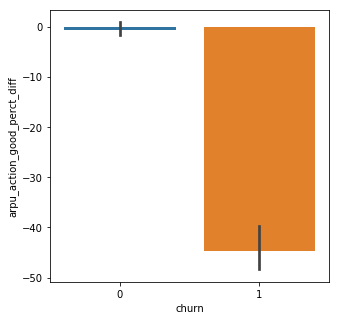

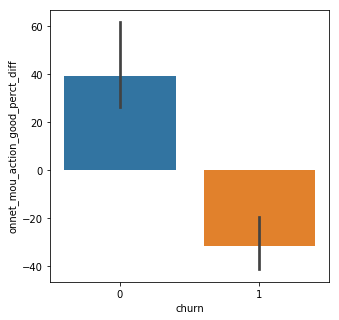

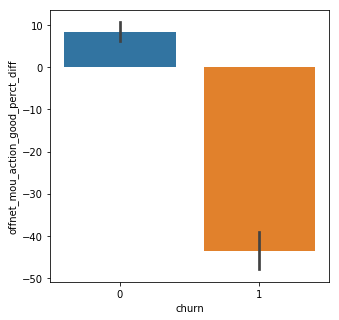

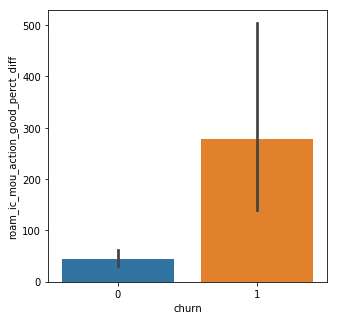

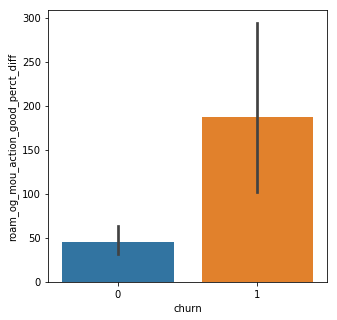

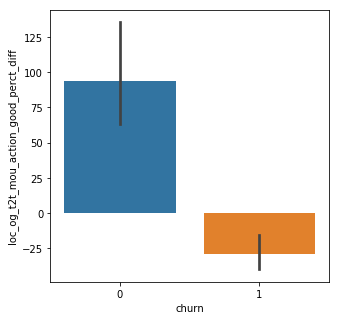

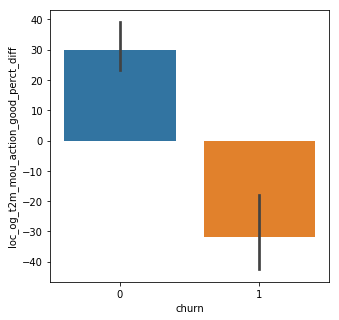

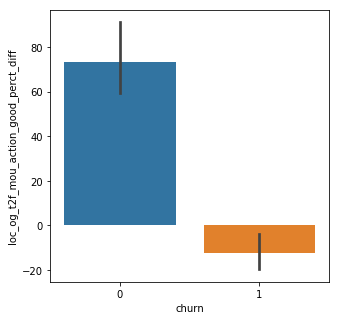

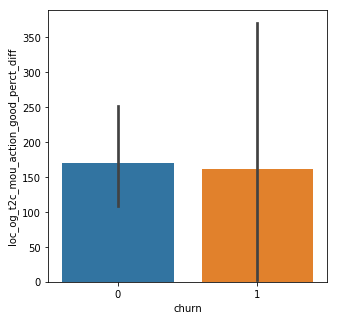

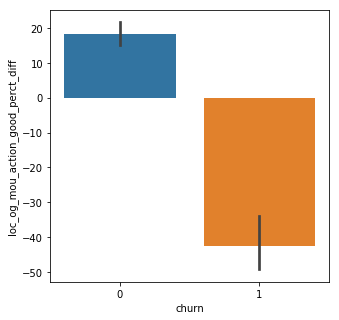

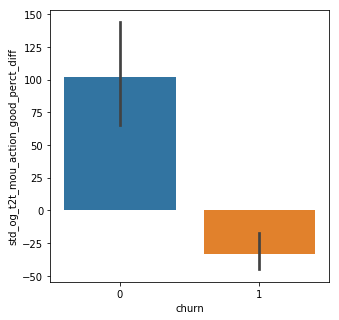

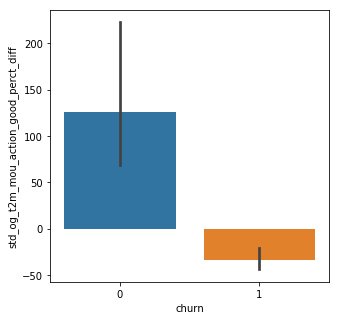

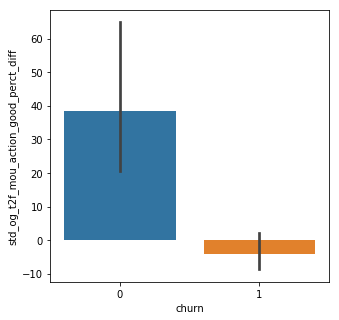

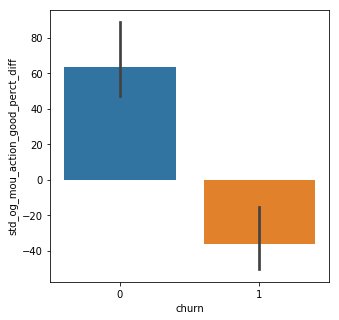

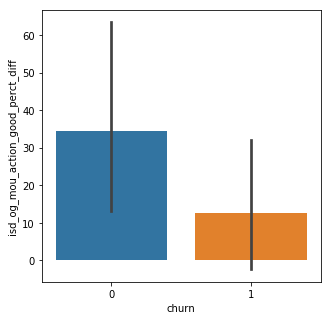

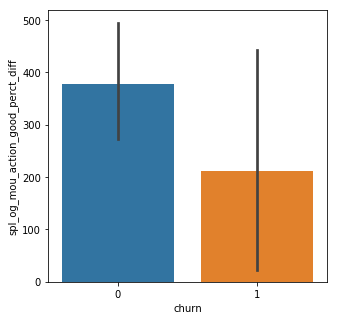

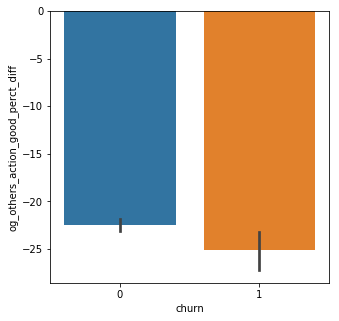

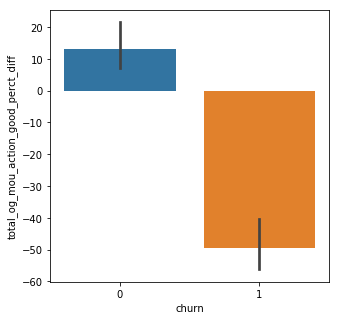

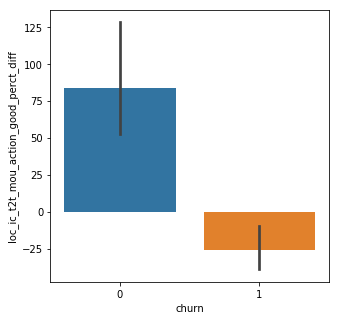

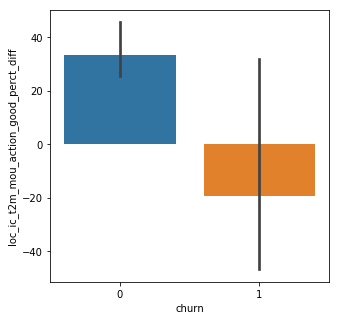

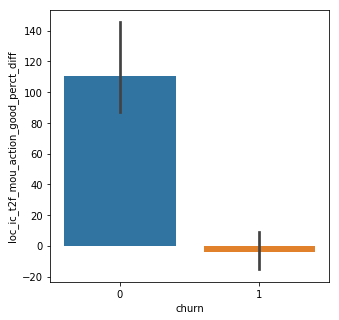

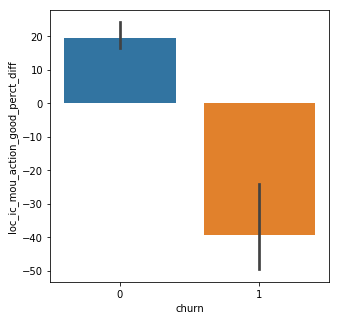

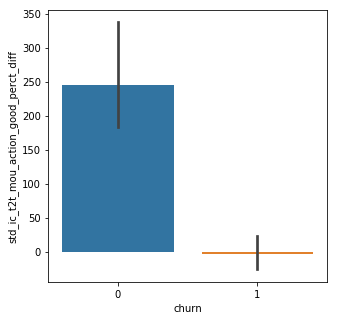

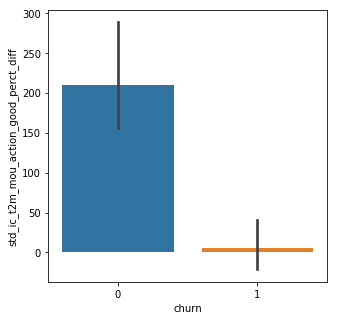

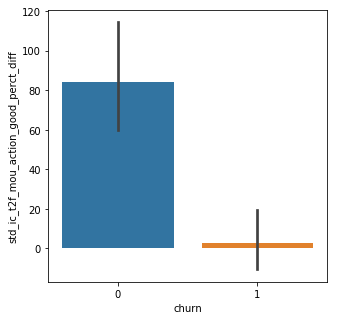

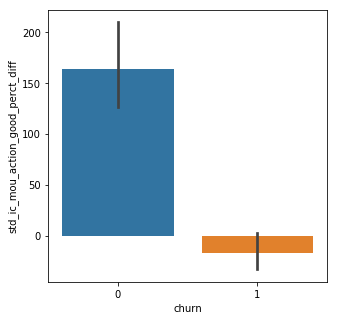

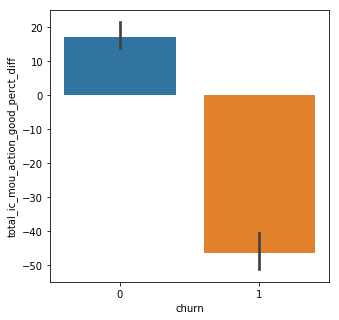

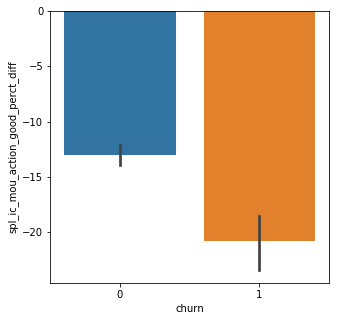

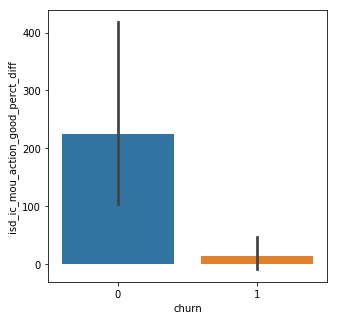

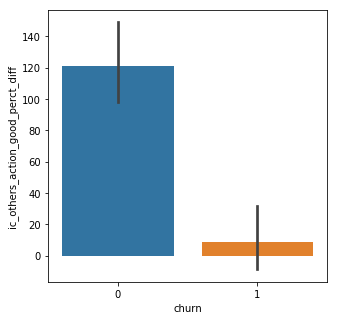

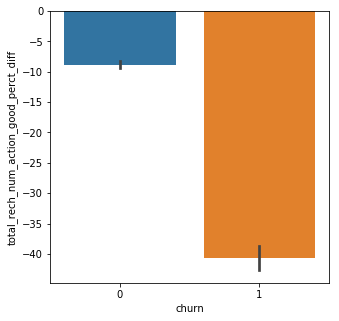

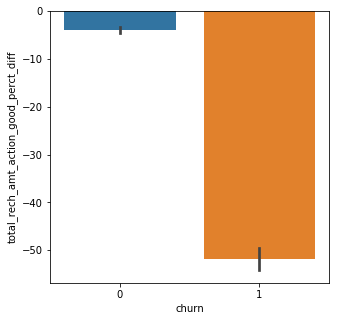

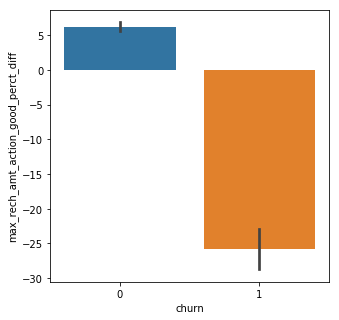

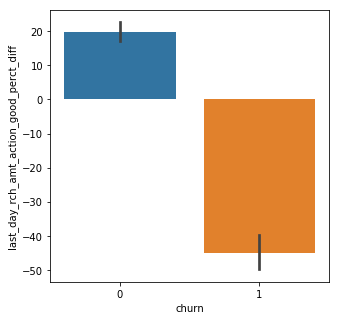

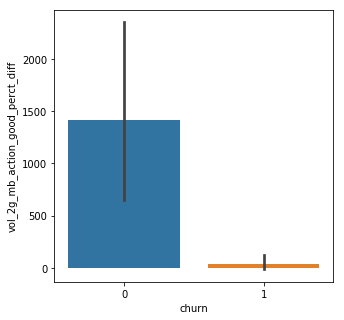

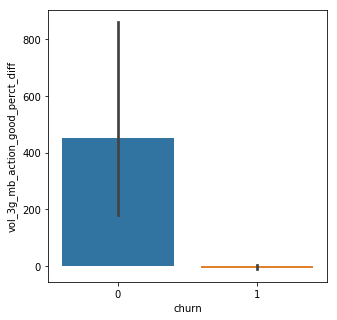

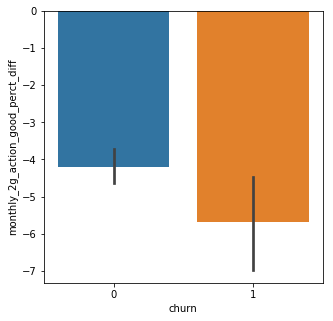

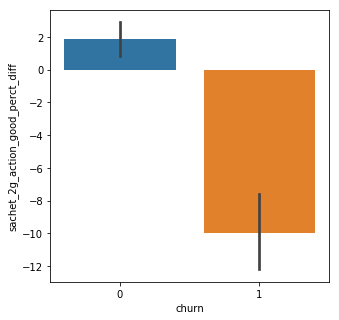

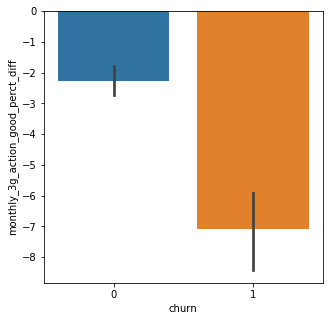

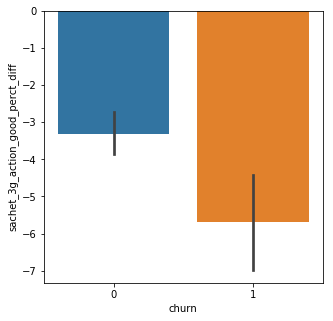

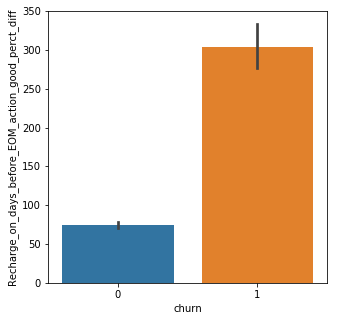

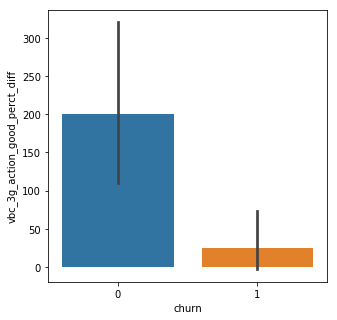

In [50]:
#sns.barplot(x='churn', y='arpu_action_good_perct_diff', data=telecom_churn_reduced_8_df)

col_diffin_phase = [x for x in telecom_churn_reduced_8_df.columns if '_action_good_perct_diff' in x]

for col in col_diffin_phase:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=telecom_churn_reduced_8_df)
    plt.show()

#### Conclusion: based on above plots we can observe that the key indicators when the user transitions from good phase to action phase who eventually churn
1. arpu - average revenue per user drops significantly 
2. offnet_mou, onnet_mou - minutes of usage of voice calls drops significantly
3. Roa_og and Roam_in - Probabaly the user has shifted the country and hence the roaming calls increase significantly and churn provide offers while roaming will work to some extent but this bunch of clients will be very less and can be ignored.
4. Loc_og  - local outgoing interms of both t2t, t2m , t2f significantly drops
but interestingly the calls to t2c i.e. to call centers have increased rapidly i.e. customers are trying to express their concerns by calling the customer care so may be addressing those concerns will stop from churning. 
5. std_og - std_og reduces significantly for the customers hwo churn 
6. total_og - total og reduces significantly 
7. total_ic, std_ic, loc_ic, std_ic reduces significantly 
8. spl_ic , spl_ic, ot_others doesnt seem to have much affect on the churn, may be we can remove them from our modelling
9. total_recharge_num, total+recharge_amnt - number of times the recharge has been done and the amount of recharge reduces significantly.
10. date_of_last_recharge - date from which the recharge is conducted reduces drastically i.e. it oes from 25th-28th-30th etc
11. volume of data consumed in all waysi.e. sachet, vbc, 2g 3g all of them drop significantly.


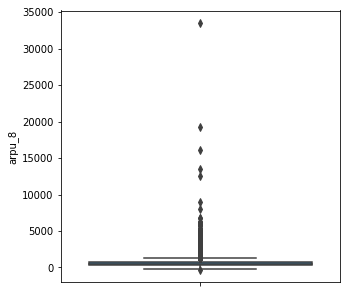

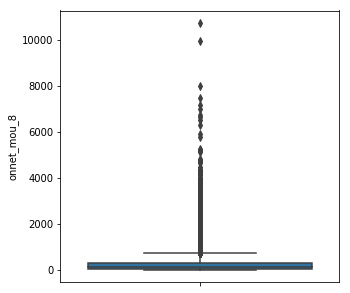

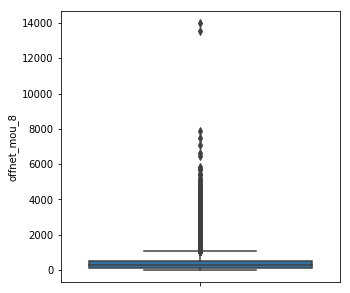

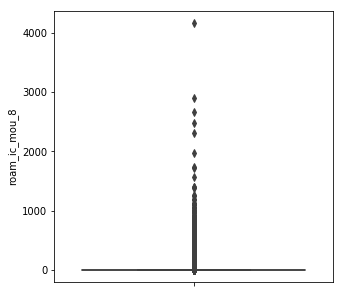

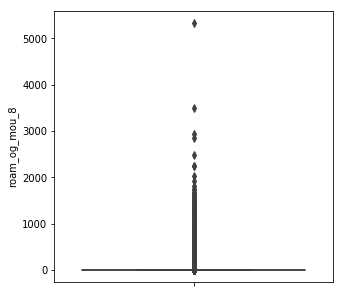

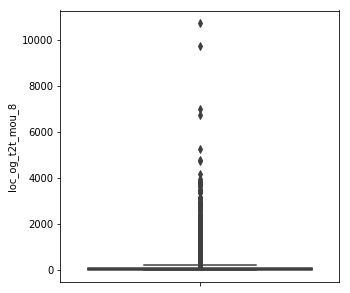

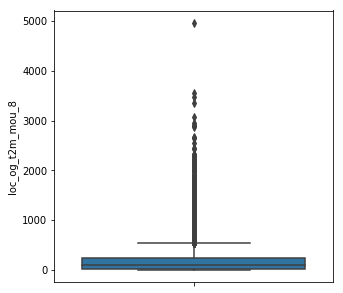

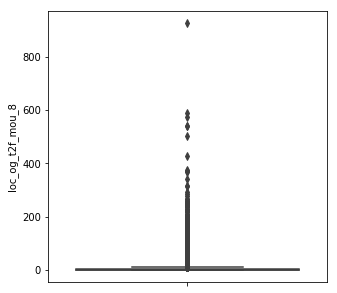

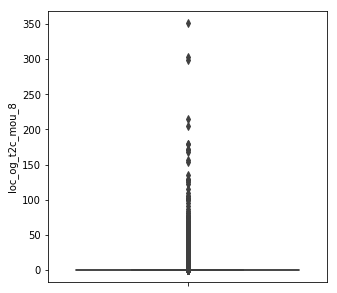

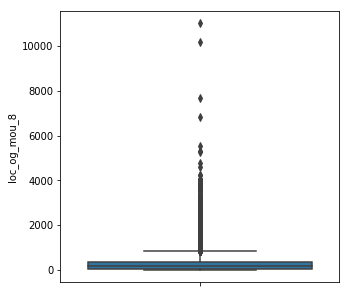

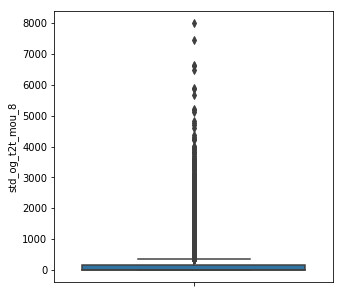

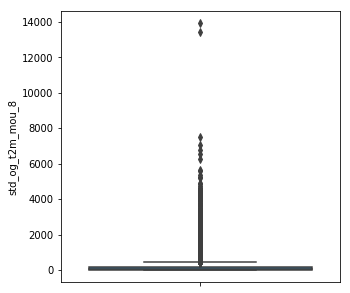

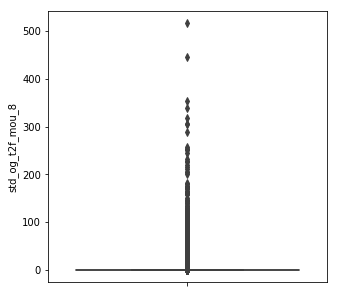

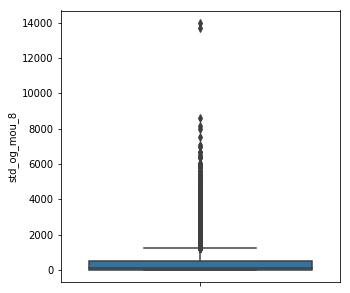

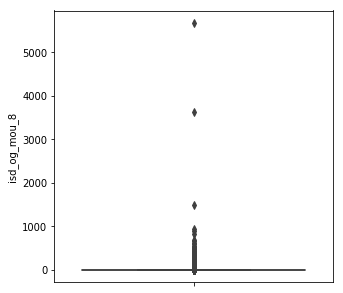

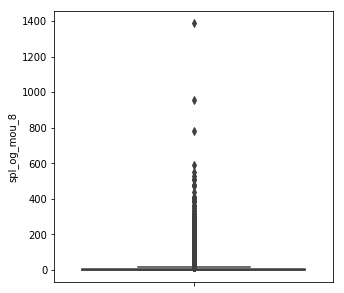

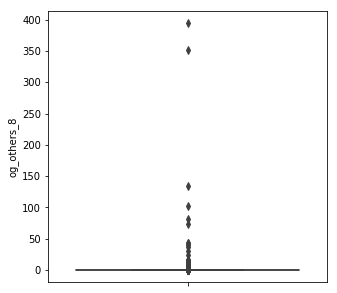

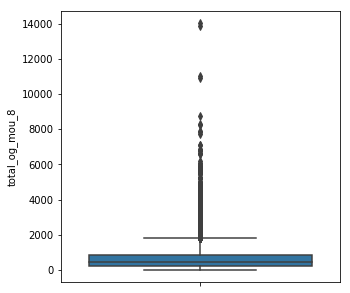

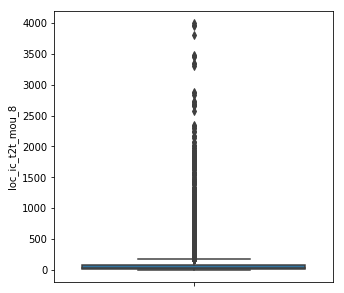

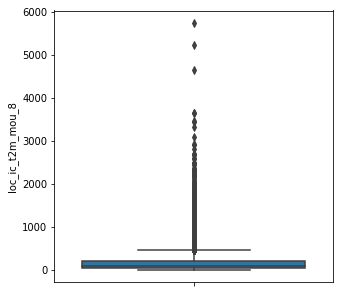

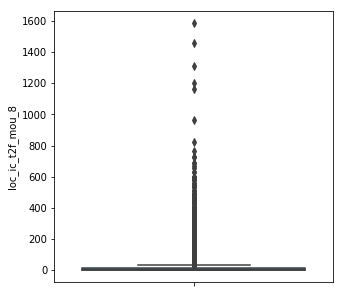

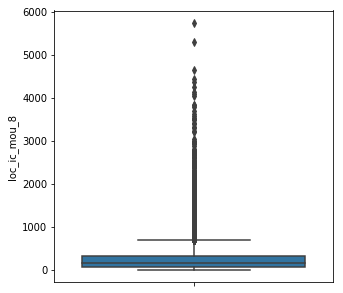

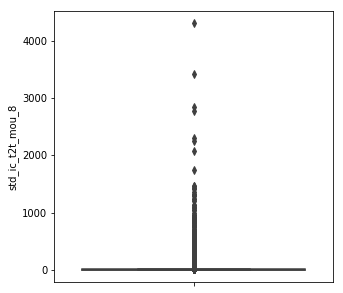

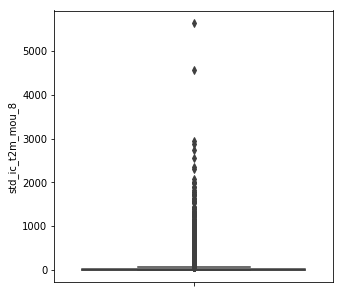

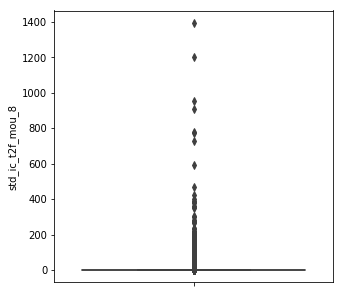

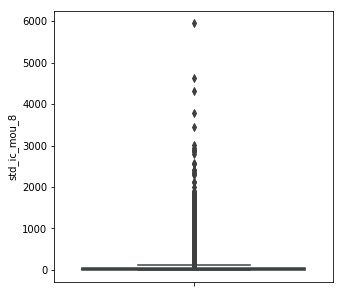

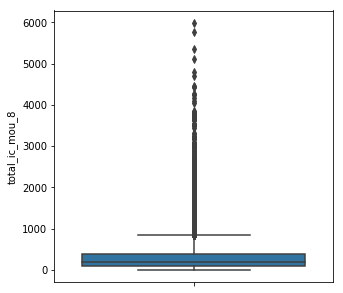

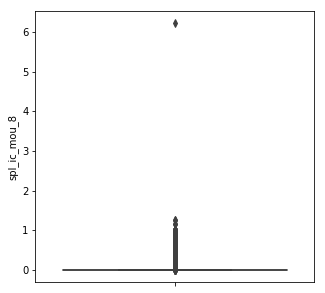

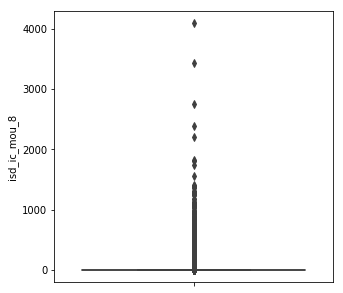

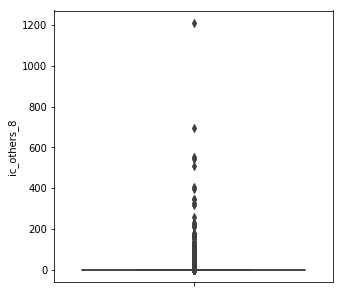

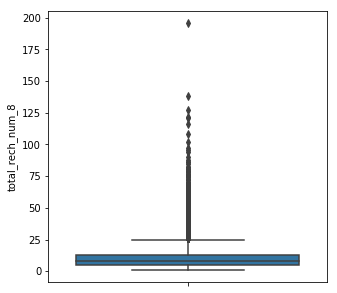

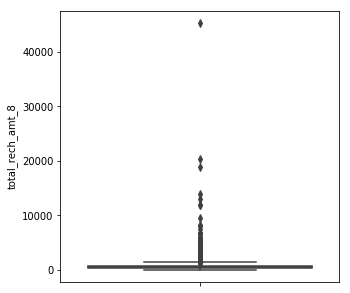

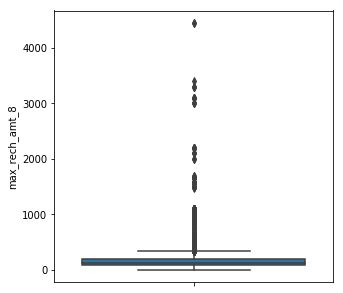

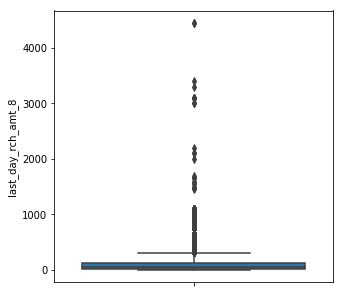

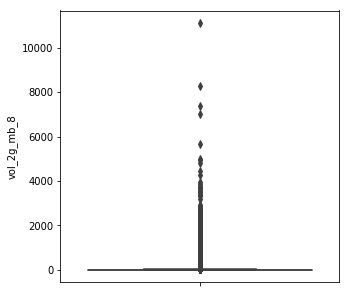

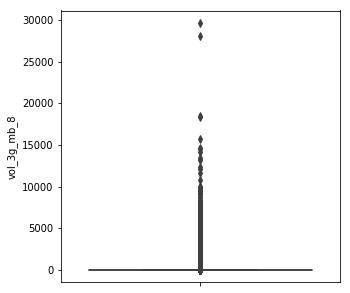

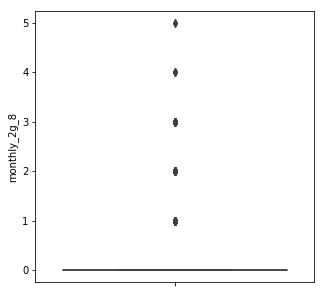

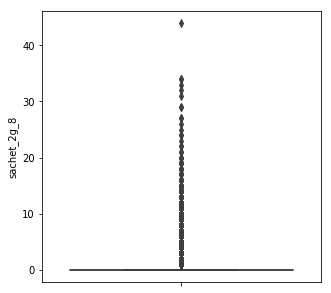

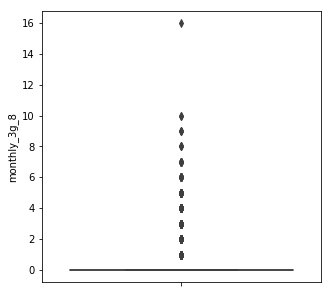

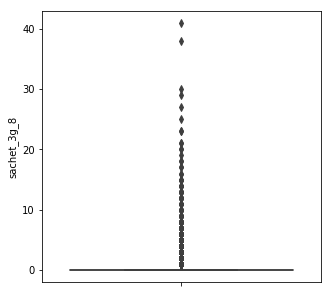

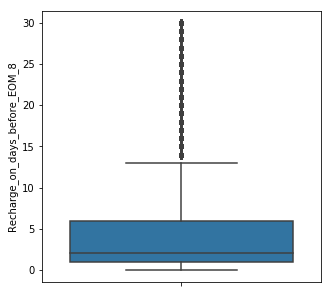

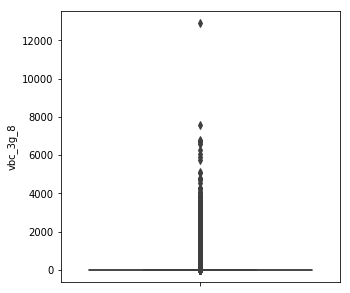

In [51]:
col_diffin_phase = [x for x in telecom_churn_reduced_8_df.columns if '_8' in x]

for col in col_diffin_phase:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=telecom_churn_reduced_8_df)
    plt.show()

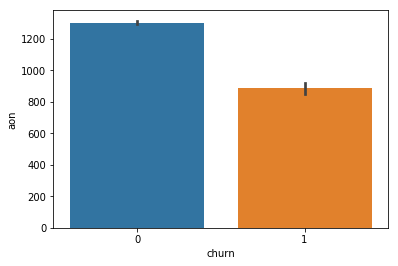

In [52]:
sns.barplot(x='churn', y='aon', data=telecom_churn_reduced_8_df)

#### Conclusion: we can observe that there are outliers in most of the attributes, lets proceed for outlier treatment and reiterate the data preparation phase

In [53]:
#dropping _diff column as EDA is already performed 

_action_good_perct_diff_col = [x for x in telecom_churn_reduced_8_df.columns if '_diff' in x]
telecom_churn_reduced_9_df = telecom_churn_reduced_8_df.drop(_action_good_perct_diff_col, axis = 1)

In [54]:
telecom_churn_reduced_9_df.shape

(28455, 86)

#### Outlier treatment - lets consider data which falls under 0.01 to 98% category

In [55]:
def drop_outliers(x):
    list = []
    for col in col_diffin_phase:
        Q1 = x[col].quantile(.01)
        Q3 = x[col].quantile(.98)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

telecom_churn_reduced_10_df = drop_outliers(telecom_churn_reduced_9_df)
telecom_churn_reduced_10_df.shape

(25537, 86)

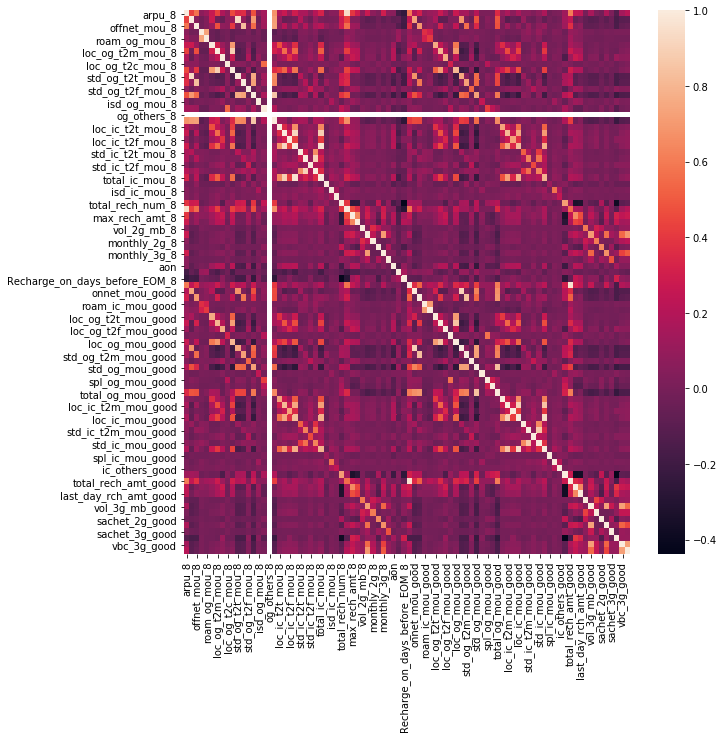

In [56]:
plt.figure(figsize = (10,10))

sns.heatmap(telecom_churn_reduced_10_df.corr())

#### `Conclusion: looks like we have a problem of multicolinearity on quite a few variables so proceeding to peroform PCA on the data 

In [57]:
#Before proceeding for model creation, lets create dummies for categorical variables 

#### Creation of dumm variables

In [58]:
print("total_rech_num_8",telecom_churn_reduced_10_df.total_rech_num_8.value_counts())
print("monthly_2g_8",telecom_churn_reduced_10_df.monthly_2g_8.value_counts())
print("sachet_2g_8",telecom_churn_reduced_10_df.sachet_2g_8.value_counts())
print("monthly_3g_8",telecom_churn_reduced_10_df.monthly_3g_8.value_counts())
print("sachet_3g_8",telecom_churn_reduced_10_df.sachet_3g_8.value_counts())
print("Recharge_on_days_before_EOM_8",telecom_churn_reduced_10_df.Recharge_on_days_before_EOM_8.value_counts())

print("total_rech_num_good",telecom_churn_reduced_10_df.total_rech_num_good.value_counts())
print("monthly_2g_good",telecom_churn_reduced_10_df.monthly_2g_good.value_counts())
print("sachet_2g_good",telecom_churn_reduced_10_df.sachet_2g_good.value_counts())
print("monthly_3g_good",telecom_churn_reduced_10_df.monthly_3g_good.value_counts())
print("sachet_3g_good",telecom_churn_reduced_10_df.sachet_3g_good.value_counts())
print("Recharge_on_days_before_EOM_good",telecom_churn_reduced_10_df.Recharge_on_days_before_EOM_good.value_counts())


total_rech_num_8 4     2141
5     2078
6     1940
3     1892
7     1741
      ... 
66       1
82       1
72       1
85       1
79       1
Name: total_rech_num_8, Length: 83, dtype: int64
monthly_2g_8 0    22867
1     2447
2      223
Name: monthly_2g_8, dtype: int64
sachet_2g_8 0     20222
1      2334
2       867
3       583
4       499
5       396
6       238
7       120
8        78
9        63
10       44
11       31
12       24
14       16
15       11
13       11
Name: sachet_2g_8, dtype: int64
monthly_3g_8 0    22689
1     2014
2      596
3      156
4       62
5       20
Name: monthly_3g_8, dtype: int64
sachet_3g_8 0    24158
1      920
2      229
3      113
4       64
5       53
Name: sachet_3g_8, dtype: int64
Recharge_on_days_before_EOM_8 0     5843
1     4201
2     2948
3     2526
6     1935
5     1781
4     1635
7     1008
8      476
9      443
11     420
12     335
10     332
13     206
15     153
14     152
17     148
16     145
20     103
19      98
26      95
18      94
22  

In [59]:
# lets covert the type of the cat variables in _good category from float to int
Cat_variables  = ['total_rech_num_8','monthly_2g_8','sachet_2g_8','monthly_3g_8','sachet_3g_8','Recharge_on_days_before_EOM_8','total_rech_num_good','monthly_2g_good','sachet_2g_good','monthly_3g_good','sachet_3g_good','Recharge_on_days_before_EOM_good']
telecom_churn_reduced_10_df[Cat_variables] = telecom_churn_reduced_10_df[Cat_variables].astype('int')

In [60]:
telecom_churn_reduced_10_df.shape

(25537, 86)

In [61]:
#get list of continuos variables, it will be further used in scaling of data
telecom_churn_reduced_10_df.columns
Cont_variables = [x for x in telecom_churn_reduced_10_df.columns if x not in Cat_variables]
#remove churn as part of Cont_variables
Cont_variables = [x for x in Cont_variables if x != 'churn']
print(len(Cont_variables))

73


In [62]:
telecom_churn_reduced_11_df = telecom_churn_reduced_10_df

In [63]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.

for each in range(0, len(Cat_variables)):
    cont = pd.get_dummies(telecom_churn_reduced_11_df[Cat_variables[each]],prefix=Cat_variables[each],drop_first=True)
    #Adding the results to the master dataframe
    telecom_churn_reduced_11_df = pd.concat([telecom_churn_reduced_11_df,cont],axis=1)

In [64]:
telecom_churn_reduced_11_df.shape

(25537, 389)

In [65]:
telecom_churn_reduced_11_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,Recharge_on_days_before_EOM_8,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,Recharge_on_days_before_EOM_good,vbc_3g_good,vbc_3g_8,total_rech_num_8_2,total_rech_num_8_3,total_rech_num_8_4,total_rech_num_8_5,total_rech_num_8_6,total_rech_num_8_7,total_rech_num_8_8,total_rech_num_8_9,total_rech_num_8_10,total_rech_num_8_11,total_rech_num_8_12,total_rech_num_8_13,total_rech_num_8_14,total_rech_num_8_15,total_rech_num_8_16,total_rech_num_8_17,total_rech_num_8_18,total_rech_num_8_19,total_rech_num_8_20,total_rech_num_8_21,total_rech_num_8_22,total_rech_num_8_23,total_rech_num_8_24,total_rech_num_8_25,total_rech_num_8_26,total_rech_num_8_27,total_rech_num_8_28,total_rech_num_8_29,total_rech_num_8_30,total_rech_num_8_31,total_rech_num_8_32,total_rech_num_8_33,total_rech_num_8_34,total_rech_num_8_35,total_rech_num_8_36,total_rech_num_8_37,total_rech_num_8_38,total_rech_num_8_39,total_rech_num_8_40,total_rech_num_8_41,total_rech_num_8_42,total_rech_num_8_43,total_rech_num_8_44,total_rech_num_8_45,total_rech_num_8_46,total_rech_num_8_47,total_rech_num_8_48,total_rech_num_8_49,total_rech_num_8_50,total_rech_num_8_51,total_rech_num_8_52,total_rech_num_8_53,total_rech_num_8_54,total_rech_num_8_55,total_rech_num_8_56,total_rech_num_8_57,total_rech_num_8_58,total_rech_num_8_59,total_rech_num_8_60,total_rech_num_8_61,total_rech_num_8_62,total_rech_num_8_63,total_rech_num_8_64,total_rech_num_8_65,total_rech_num_8_66,total_rech_num_8_67,total_rech_num_8_68,total_rech_num_8_69,total_rech_num_8_70,total_rech_num_8_72,total_rech_num_8_73,total_rech_num_8_74,total_rech_num_8_75,total_rech_num_8_76,total_rech_num_8_77,total_rech_num_8_78,total_rech_num_8_79,total_rech_num_8_81,total_rech_num_8_82,total_rech_num_8_85,total_rech_num_8_86,total_rech_num_8_88,monthly_2g_8_1,monthly_2g_8_2,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_2g_8_9,sachet_2g_8_10,sachet_2g_8_11,sachet_2g_8_12,sachet_2g_8_13,sachet_2g_8_14,sachet_2g_8_15,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,sachet_3g_8_1,sachet_3g_8_2,sachet_3g_8_3,sachet_3g_8_4,sachet_3g_8_5,Recharge_on_days_before_EOM_8_1,Recharge_on_days_before_EOM_8_2,Recharge_on_days_before_EOM_8_3,Recharge_on_days_before_EOM_8_4,Recharge_on_days_before_EOM_8_5,Recharge_on_days_before_EOM_8_6,Recharge_on_days_before_EOM_8_7,Recharge_on_days_before_EOM_8_8,Recharge_on_days_before_EOM_8_9,Recharge_on_days_before_EOM_8_10,Recharge_on_days_before_EOM_8_11,Recharge_on_days_before_EOM_8_12,Recharge_on_days_before_EOM_8_13,Recharge_on_days_before_EOM_8_14,Recharge_on_days_before_EOM_8_15,Recharge_on_days_before_EOM_8_16,Recharge_on_days_before_EOM_8_17,Recharge_on_days_before_EOM_8_18,Recharge_on_day

### Model Buidling -1 (Logistic Regression with PCA)

#### Scaling and Train-Test-Split

In [66]:
telecom_churn_reduced_12_df =telecom_churn_reduced_11_df

In [67]:
#import libraries for train test split and standard scaler 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

df_train,df_test = train_test_split(telecom_churn_reduced_12_df,train_size=0.7,test_size=0.3,random_state=100)
df_test[Cont_variables].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7662 entries, 21558 to 84800
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   arpu_8                 7662 non-null   float64
 1   onnet_mou_8            7662 non-null   float64
 2   offnet_mou_8           7662 non-null   float64
 3   roam_ic_mou_8          7662 non-null   float64
 4   roam_og_mou_8          7662 non-null   float64
 5   loc_og_t2t_mou_8       7662 non-null   float64
 6   loc_og_t2m_mou_8       7662 non-null   float64
 7   loc_og_t2f_mou_8       7662 non-null   float64
 8   loc_og_t2c_mou_8       7662 non-null   float64
 9   loc_og_mou_8           7662 non-null   float64
 10  std_og_t2t_mou_8       7662 non-null   float64
 11  std_og_t2m_mou_8       7662 non-null   float64
 12  std_og_t2f_mou_8       7662 non-null   float64
 13  std_og_mou_8           7662 non-null   float64
 14  isd_og_mou_8           7662 non-null   float64
 15 

In [68]:
scaler = StandardScaler()
df_train[Cont_variables] = scaler.fit_transform(df_train[Cont_variables])
df_test[Cont_variables] = scaler.transform(df_test[Cont_variables])

In [69]:
df_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,Recharge_on_days_before_EOM_8,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,Recharge_on_days_before_EOM_good,vbc_3g_good,vbc_3g_8,total_rech_num_8_2,total_rech_num_8_3,total_rech_num_8_4,total_rech_num_8_5,total_rech_num_8_6,total_rech_num_8_7,total_rech_num_8_8,total_rech_num_8_9,total_rech_num_8_10,total_rech_num_8_11,total_rech_num_8_12,total_rech_num_8_13,total_rech_num_8_14,total_rech_num_8_15,total_rech_num_8_16,total_rech_num_8_17,total_rech_num_8_18,total_rech_num_8_19,total_rech_num_8_20,total_rech_num_8_21,total_rech_num_8_22,total_rech_num_8_23,total_rech_num_8_24,total_rech_num_8_25,total_rech_num_8_26,total_rech_num_8_27,total_rech_num_8_28,total_rech_num_8_29,total_rech_num_8_30,total_rech_num_8_31,total_rech_num_8_32,total_rech_num_8_33,total_rech_num_8_34,total_rech_num_8_35,total_rech_num_8_36,total_rech_num_8_37,total_rech_num_8_38,total_rech_num_8_39,total_rech_num_8_40,total_rech_num_8_41,total_rech_num_8_42,total_rech_num_8_43,total_rech_num_8_44,total_rech_num_8_45,total_rech_num_8_46,total_rech_num_8_47,total_rech_num_8_48,total_rech_num_8_49,total_rech_num_8_50,total_rech_num_8_51,total_rech_num_8_52,total_rech_num_8_53,total_rech_num_8_54,total_rech_num_8_55,total_rech_num_8_56,total_rech_num_8_57,total_rech_num_8_58,total_rech_num_8_59,total_rech_num_8_60,total_rech_num_8_61,total_rech_num_8_62,total_rech_num_8_63,total_rech_num_8_64,total_rech_num_8_65,total_rech_num_8_66,total_rech_num_8_67,total_rech_num_8_68,total_rech_num_8_69,total_rech_num_8_70,total_rech_num_8_72,total_rech_num_8_73,total_rech_num_8_74,total_rech_num_8_75,total_rech_num_8_76,total_rech_num_8_77,total_rech_num_8_78,total_rech_num_8_79,total_rech_num_8_81,total_rech_num_8_82,total_rech_num_8_85,total_rech_num_8_86,total_rech_num_8_88,monthly_2g_8_1,monthly_2g_8_2,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_2g_8_9,sachet_2g_8_10,sachet_2g_8_11,sachet_2g_8_12,sachet_2g_8_13,sachet_2g_8_14,sachet_2g_8_15,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,sachet_3g_8_1,sachet_3g_8_2,sachet_3g_8_3,sachet_3g_8_4,sachet_3g_8_5,Recharge_on_days_before_EOM_8_1,Recharge_on_days_before_EOM_8_2,Recharge_on_days_before_EOM_8_3,Recharge_on_days_before_EOM_8_4,Recharge_on_days_before_EOM_8_5,Recharge_on_days_before_EOM_8_6,Recharge_on_days_before_EOM_8_7,Recharge_on_days_before_EOM_8_8,Recharge_on_days_before_EOM_8_9,Recharge_on_days_before_EOM_8_10,Recharge_on_days_before_EOM_8_11,Recharge_on_days_before_EOM_8_12,Recharge_on_days_before_EOM_8_13,Recharge_on_days_before_EOM_8_14,Recharge_on_days_before_EOM_8_15,Recharge_on_days_before_EOM_8_16,Recharge_on_days_before_EOM_8_17,Recharge_on_days_before_EOM_8_18,Recharge_on_day

In [70]:
df_train.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,Recharge_on_days_before_EOM_8,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,Recharge_on_days_before_EOM_good,vbc_3g_good,vbc_3g_8,total_rech_num_8_2,total_rech_num_8_3,total_rech_num_8_4,total_rech_num_8_5,total_rech_num_8_6,total_rech_num_8_7,total_rech_num_8_8,total_rech_num_8_9,total_rech_num_8_10,total_rech_num_8_11,total_rech_num_8_12,total_rech_num_8_13,total_rech_num_8_14,total_rech_num_8_15,total_rech_num_8_16,total_rech_num_8_17,total_rech_num_8_18,total_rech_num_8_19,total_rech_num_8_20,total_rech_num_8_21,total_rech_num_8_22,total_rech_num_8_23,total_rech_num_8_24,total_rech_num_8_25,total_rech_num_8_26,total_rech_num_8_27,total_rech_num_8_28,total_rech_num_8_29,total_rech_num_8_30,total_rech_num_8_31,total_rech_num_8_32,total_rech_num_8_33,total_rech_num_8_34,total_rech_num_8_35,total_rech_num_8_36,total_rech_num_8_37,total_rech_num_8_38,total_rech_num_8_39,total_rech_num_8_40,total_rech_num_8_41,total_rech_num_8_42,total_rech_num_8_43,total_rech_num_8_44,total_rech_num_8_45,total_rech_num_8_46,total_rech_num_8_47,total_rech_num_8_48,total_rech_num_8_49,total_rech_num_8_50,total_rech_num_8_51,total_rech_num_8_52,total_rech_num_8_53,total_rech_num_8_54,total_rech_num_8_55,total_rech_num_8_56,total_rech_num_8_57,total_rech_num_8_58,total_rech_num_8_59,total_rech_num_8_60,total_rech_num_8_61,total_rech_num_8_62,total_rech_num_8_63,total_rech_num_8_64,total_rech_num_8_65,total_rech_num_8_66,total_rech_num_8_67,total_rech_num_8_68,total_rech_num_8_69,total_rech_num_8_70,total_rech_num_8_72,total_rech_num_8_73,total_rech_num_8_74,total_rech_num_8_75,total_rech_num_8_76,total_rech_num_8_77,total_rech_num_8_78,total_rech_num_8_79,total_rech_num_8_81,total_rech_num_8_82,total_rech_num_8_85,total_rech_num_8_86,total_rech_num_8_88,monthly_2g_8_1,monthly_2g_8_2,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_2g_8_9,sachet_2g_8_10,sachet_2g_8_11,sachet_2g_8_12,sachet_2g_8_13,sachet_2g_8_14,sachet_2g_8_15,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,sachet_3g_8_1,sachet_3g_8_2,sachet_3g_8_3,sachet_3g_8_4,sachet_3g_8_5,Recharge_on_days_before_EOM_8_1,Recharge_on_days_before_EOM_8_2,Recharge_on_days_before_EOM_8_3,Recharge_on_days_before_EOM_8_4,Recharge_on_days_before_EOM_8_5,Recharge_on_days_before_EOM_8_6,Recharge_on_days_before_EOM_8_7,Recharge_on_days_before_EOM_8_8,Recharge_on_days_before_EOM_8_9,Recharge_on_days_before_EOM_8_10,Recharge_on_days_before_EOM_8_11,Recharge_on_days_before_EOM_8_12,Recharge_on_days_before_EOM_8_13,Recharge_on_days_before_EOM_8_14,Recharge_on_days_before_EOM_8_15,Recharge_on_days_before_EOM_8_16,Recharge_on_days_before_EOM_8_17,Recharge_on_days_before_EOM_8_18,Recharge_on_day

In [71]:
#for train
y_train = df_train.pop('churn')
X_train = df_train

#for test
y_test = df_test.pop('churn')
X_test = df_test
y_train.head()

60276    0
34438    0
74412    1
25051    0
21741    0
Name: churn, dtype: int64

#### Perform PCA

In [72]:
#import libraries required for PCA
from sklearn.decomposition import PCA

In [73]:
pca = PCA(random_state=100)

In [74]:
pca.fit(X_train)

PCA(random_state=100)

In [75]:
#check the components from PCA
pca.components_

array([[ 2.60909810e-02,  2.15847966e-02,  2.14967118e-02, ...,
        -8.95347890e-06, -6.85330718e-06, -7.00809392e-06],
       [-6.49592128e-02, -3.81695025e-02, -4.74228613e-02, ...,
         2.69402425e-05, -5.24313248e-06, -2.77343382e-06],
       [-4.77709559e-02, -1.40138496e-02, -2.50326757e-02, ...,
        -7.35690427e-05, -2.29388974e-05, -2.44310758e-05],
       ...,
       [-0.00000000e+00, -4.42652903e-17, -5.43730245e-17, ...,
         6.02736986e-05,  6.25060578e-05,  6.47384170e-05],
       [ 0.00000000e+00,  4.84909428e-20,  1.63657126e-19, ...,
        -6.97912826e-18, -2.70301050e-17, -1.69689300e-17],
       [ 0.00000000e+00,  9.98753605e-18,  9.96593335e-18, ...,
        -8.35560408e-17, -8.26104605e-17, -7.55823127e-17]])

In [76]:
pca.explained_variance_ratio_

array([5.14531468e-01, 9.92179003e-02, 6.46489573e-02, 3.77705470e-02,
       3.00441300e-02, 2.60017492e-02, 1.58394952e-02, 1.42520547e-02,
       1.28008819e-02, 1.23293025e-02, 9.48741703e-03, 8.47839557e-03,
       7.84886469e-03, 7.65046245e-03, 6.82951655e-03, 6.47462967e-03,
       5.91309560e-03, 5.61014942e-03, 5.26998243e-03, 4.94119098e-03,
       4.35036222e-03, 4.12031283e-03, 3.92683780e-03, 3.91608890e-03,
       3.72118762e-03, 3.61933296e-03, 3.49554039e-03, 3.40483726e-03,
       3.28109812e-03, 3.21881496e-03, 3.03015400e-03, 2.98514198e-03,
       2.85167939e-03, 2.83966282e-03, 2.77220667e-03, 2.69447010e-03,
       2.39388747e-03, 2.29908683e-03, 2.18415132e-03, 2.04708158e-03,
       1.89822725e-03, 1.81846622e-03, 1.75556273e-03, 1.63806478e-03,
       1.58325916e-03, 1.54854974e-03, 1.52531328e-03, 1.46088191e-03,
       1.38595494e-03, 1.22362108e-03, 1.15578014e-03, 1.11808255e-03,
       1.03253428e-03, 9.33720924e-04, 9.28873282e-04, 8.94491819e-04,
      

In [77]:
#plot a scree plot to understand the variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)

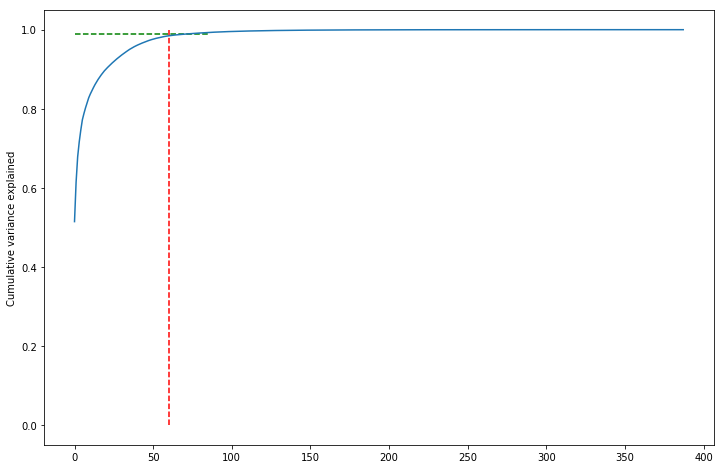

In [78]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.99, xmax=85, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Conclusion: at 60 components we are able to estimate 99% variance so lets proceed for PCA with 60 components 

In [79]:
from sklearn.decomposition import IncrementalPCA

In [80]:
pca_final = IncrementalPCA(n_components=60)

In [81]:
df_train_pca = pca_final.fit_transform(X_train)

In [82]:
df_train_pca.shape

(17875, 60)

In [83]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [84]:
corrmat.shape

(60, 60)

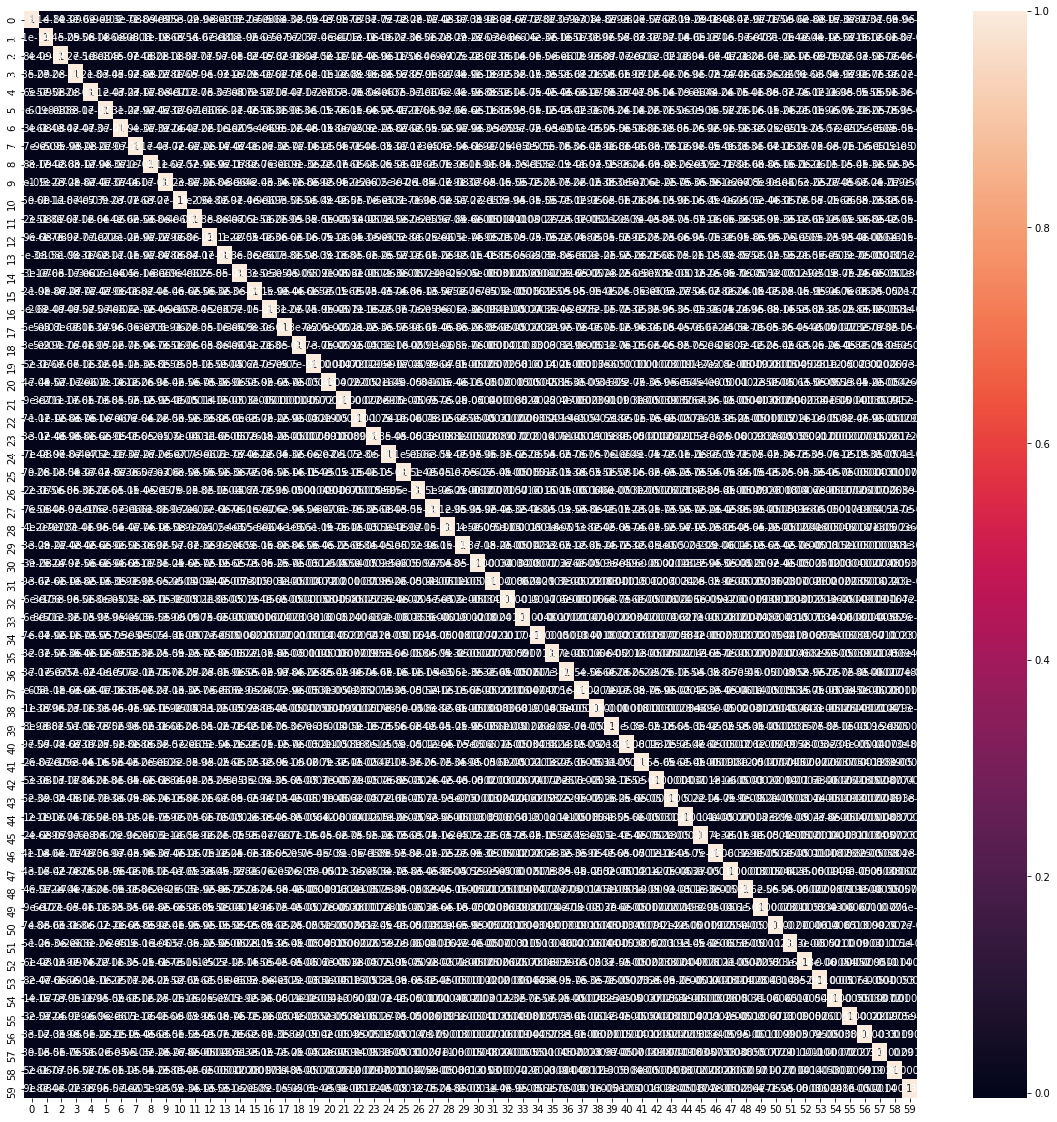

In [85]:
#Plot Corr matrix
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)

#### Conclusion: we can see that PCA reduced all multicolinearity

In [86]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7662, 60)

#### Logistic Regression (with balanced class weights to reduce class imbalance)on the components after PCA

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
learner_pca = LogisticRegression(class_weight = {0:0.1, 1:0.9})

In [89]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [90]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [91]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.87'

#### Conclusion : with 60 attributes, we are able to explain 99% variance and with roc score as 87%

#### Paraameter tuning -1 : Tune with explained variance as 90% and weighted class parameters 

In [92]:
Accuracy_param = [0.7, 0.73, 0.75, 0.78, 0.8, 0.83, 0.85, 0.88, 0.90, 0.93, 0.95, 0.98, 0.99]
number_of_components = []
roc_scores_test = []
roc_scores_train = []
accuracy = []
Sensitivity = []
Specificity = []
for each in Accuracy_param:
    #perform PCA with each value in Accuracy parameter
    pca_again = PCA(each)
    df_train_pca2 = pca_again.fit_transform(X_train)
    number_of_components.append(df_train_pca2.shape[1])
    
    #perform logistic regression with weighted class on the PCA data
    learner_pca2 = LogisticRegression(class_weight = {0:0.1, 1:0.9})
    model_pca2 = learner_pca2.fit(df_train_pca2, y_train)
    
    #perform Logistic regression on test data
    df_test_pca2 = pca_again.transform(X_test)
    
    # predict probability and store in variable for further analysis
    pred_probs_train2 = model_pca2.predict_proba(df_train_pca2)[:,1]
    pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
    y_pred_default = model_pca2.predict(df_test_pca2)
    # print(classification_report(y_test,y_pred_default))

    accuracy.append(accuracy_score(y_test,y_pred_default))
    Met = metrics.confusion_matrix(y_test, y_pred_default)
    Sensitivity.append(Met[0,0]/(Met[0,0]+Met[0,1]))
    Specificity.append(Met[1,1]/(Met[1,0]+Met[1,1]))
    roc_scores_train.append("{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train2)))
    roc_scores_test.append("{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2)))

In [93]:
#convert list to data frame to analyse easily
PCA_Analysis_pd = pd.DataFrame(
    {'Accuracy_param': Accuracy_param,
     'number_of_attributes': number_of_components,
     'roc_scores_train': roc_scores_train,
     'roc_scores_test': roc_scores_test,
     'Accuracy': accuracy,
     'Sensitivity': Sensitivity,
     'Specificity': Specificity

    })
PCA_Analysis_pd.roc_scores_test = PCA_Analysis_pd.roc_scores_test.astype('float')
PCA_Analysis_pd.roc_scores_train = PCA_Analysis_pd.roc_scores_train.astype('float')
PCA_Analysis_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Accuracy_param        13 non-null     float64
 1   number_of_attributes  13 non-null     int64  
 2   roc_scores_train      13 non-null     float64
 3   roc_scores_test       13 non-null     float64
 4   Accuracy              13 non-null     float64
 5   Sensitivity           13 non-null     float64
 6   Specificity           13 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 856.0 bytes


### Model Evaluation -1 (Logistic Regression with PCA)

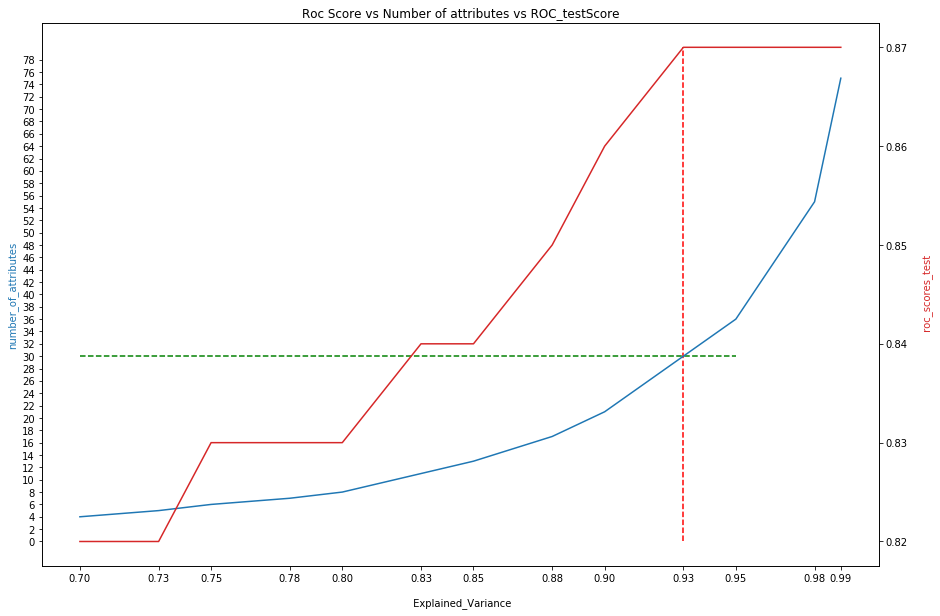

In [94]:
# Plot explained variance vs ROC vs Number of attributes

plt.figure(figsize=[15,10])
plt.xticks(Accuracy_param)
plt.yticks(np.arange(0, 80, step=2))
plt.vlines(x=0.93, ymax=80, ymin=0, colors="r", linestyles="--")
plt.hlines(y=30, xmax=0.95, xmin=0.70, colors="g", linestyles="--")
ax6 = sns.lineplot(x="Accuracy_param", y="number_of_attributes", data=PCA_Analysis_pd)
color1 = 'tab:blue'
ax6.set_title('Roc Score vs Number of attributes vs ROC_testScore')
ax6.set_xlabel('\n Explained_Variance', fontsize=10)
ax6.set_ylabel('number_of_attributes', fontsize=10, color=color1)
ax7 = ax6.twinx()
color2 = 'tab:red'
ax7 = sns.lineplot(x='Accuracy_param', y='roc_scores_test', data = PCA_Analysis_pd, color=color2)
ax7.set_ylabel('\n roc_scores_test', fontsize=10, color=color2)
plt.show()

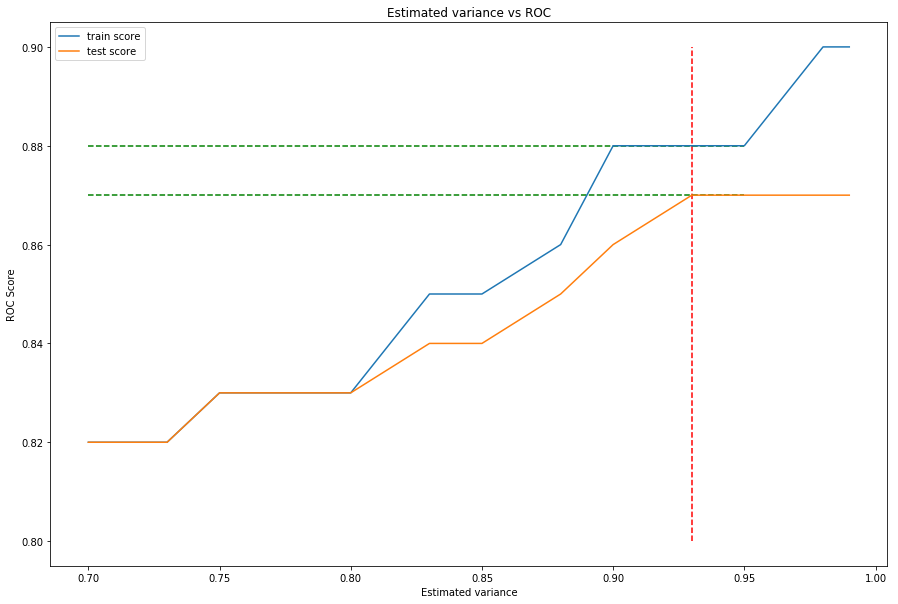

In [95]:
# Plot train ROC vs Test ROC 

plt.figure(figsize=(15,10))
plt.vlines(x=0.93, ymax=0.90, ymin=0.80, colors="r", linestyles="--")
plt.hlines(y=0.88, xmax=0.95, xmin=0.70, colors="g", linestyles="--")
plt.hlines(y=0.87, xmax=0.95, xmin=0.70, colors="g", linestyles="--")
plt.plot(PCA_Analysis_pd.Accuracy_param,PCA_Analysis_pd.roc_scores_train)
plt.plot(PCA_Analysis_pd.Accuracy_param,PCA_Analysis_pd.roc_scores_test)


plt.title('Estimated variance vs ROC')
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlabel('Estimated variance')
plt.ylabel('ROC Score')
plt.show()

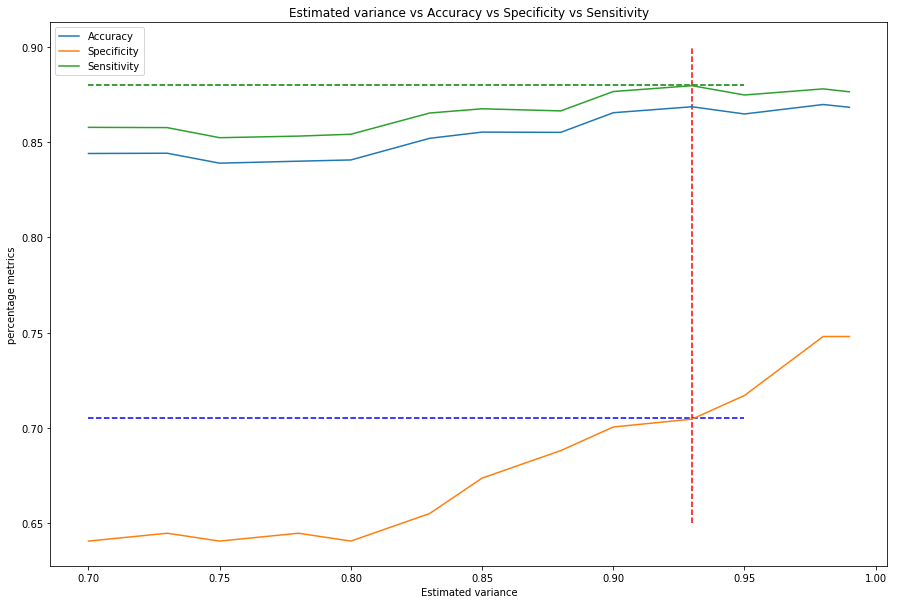

In [96]:
#lets calculate 

plt.figure(figsize=(15,10))
plt.vlines(x=0.93, ymax=0.90, ymin=0.65, colors="r", linestyles="--")
plt.hlines(y=0.88, xmax=0.95, xmin=0.70, colors="g", linestyles="--")
plt.hlines(y=0.705, xmax=0.95, xmin=0.70, colors="b", linestyles="--")
plt.plot(PCA_Analysis_pd.Accuracy_param,PCA_Analysis_pd.Accuracy)
plt.plot(PCA_Analysis_pd.Accuracy_param,PCA_Analysis_pd.Specificity)
plt.plot(PCA_Analysis_pd.Accuracy_param,PCA_Analysis_pd.Sensitivity)



plt.legend(['Accuracy', 'Specificity','Sensitivity'], loc='upper left')
plt.title('Estimated variance vs Accuracy vs Specificity vs Sensitivity')
plt.xlabel('Estimated variance')
plt.ylabel('percentage metrics')
plt.show()

#### Conclusion: PCA worked really well, based on the graphs and analysis best parameter would be to go for 93% variance which gives

1. ROC for train data as 88% and test data as 87%
2. Number of attributes of the model would be 30
3. Accuracy of model would be 86%
4. Sensitivity(True Positive Rate) would be 88%
5. Specificity(True Negative Rate) would be 70%

In [139]:
LogisticRegressionScore ={'Model': 'Logistic Regression',
    'Accuracy': 86,
     'ROC': 87,
     'Sensitivity': 88,
     'Specificity': 70,
    }
print(LogisticRegressionScore)

{'Model': 'Logistic Regression', 'Accuracy': 86, 'ROC': 87, 'Sensitivity': 88, 'Specificity': 70}


### Perform PCA with 30 attributes and proceed further for other classifcation models and compare with Logistic regression model.

In [98]:
pca_final = IncrementalPCA(n_components=30)
df_train_pca_final = pca_final.fit_transform(X_train)
df_train_pca_final.shape

(17875, 30)

In [99]:
df_test_pca_final = pca_final.transform(X_test)
df_test_pca_final.shape

(7662, 30)

### Model Building - II (Decision tree with PCA)

In [100]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

#default parameters
decisionTree_1 = DecisionTreeClassifier(max_depth=5, class_weight = {0:0.1, 1:0.9})
decisionTree_1.fit(df_train_pca_final,y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5)

In [101]:
# Analysing model with default parameters

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_decisionTree_1 = decisionTree_1.predict(df_test_pca_final)

In [102]:
classification_report(y_test,y_pred_decisionTree_1)

'              precision    recall  f1-score   support\n\n           0       0.97      0.89      0.93      7178\n           1       0.27      0.61      0.38       484\n\n    accuracy                           0.87      7662\n   macro avg       0.62      0.75      0.65      7662\nweighted avg       0.93      0.87      0.89      7662\n'

In [103]:
Met_dec = confusion_matrix(y_test,y_pred_decisionTree_1)

In [104]:
Accuracy = accuracy_score(y_test,y_pred_decisionTree_1)
print(Accuracy)

0.8724876011485252


In [105]:
Sensitivity =(Met_dec[0,0]/(Met_dec[0,0]+Met_dec[0,1]))
print(Sensitivity)

0.8899414878796322


In [106]:
Specificity = Met_dec[1,1]/(Met_dec[1,0]+Met_dec[1,1])
print(Specificity)

0.6136363636363636


In [107]:
FPR = Met_dec[0,1]/(Met_dec[0,0]+Met_dec[0,1])
print(FPR)

0.1100585121203678


In [108]:
FNR = Met_dec[1,0]/(Met_dec[1,0]+Met_dec[1,1])
print(FNR)

0.38636363636363635


In [109]:
pred_probs_test_decision = decisionTree_1.predict_proba(df_test_pca_final)[:,1]
roc_scores_test = ("{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_decision)))
print(roc_scores_test)

0.82


#### Conclusion: based on the initial decision tree model Here in the Model data

1. ROC for test data is 82%
2. Accuracy of model would be 86%
3. Sensitivity(True Positive Rate) would be 88.9%
4. Specificity(True Negative Rate) would be 61%

So decision tree without tuning is not a desirable model, lets proceed for Hyperparameter tuning and check if there is any improvement

#### Hyper Parameter tuning for decision tree

In [110]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Corss validation parameter
folds = 5

# parameters 
parameters = {  'max_depth': range(0, 20, 4),
                'min_samples_leaf': range(5, 200, 20),
                'min_samples_split': range(5, 200, 20),
                'criterion': ["entropy", "gini"]}

# instantiate the model
decisionTree_1 = DecisionTreeClassifier(class_weight={0:0.1, 1:0.9}, random_state = 100)

#do gridsearch
tree = GridSearchCV(decisionTree_1, parameters, 
                    cv=folds,n_jobs=-1,
                   verbose = 1,scoring="accuracy")
tree.fit(df_train_pca_final,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 572 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 822 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1172 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1622 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2172 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 3214 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 3964 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 4814 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 16.2min finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9},
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(0, 20, 4),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             scoring='accuracy', verbose=1)

In [111]:
tree.best_score_

0.8772587412587413

In [112]:
tree.best_estimator_

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=16, min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [113]:
#Running a best estimator for model evaluation 

decisionTree_Final = DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=16, min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [114]:
decisionTree_Final.fit(df_train_pca_final,y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=16, min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [115]:
y_pred_decisionTree_Final = decisionTree_Final.predict(df_test_pca_final)

### Model Evaluation -II

In [116]:
Met_dec_final = confusion_matrix(y_test,y_pred_decisionTree_Final)

Accuracy_df = accuracy_score(y_test,y_pred_decisionTree_Final)
print("Accuracy", Accuracy_df)

Sensitivity_df =(Met_dec_final[0,0]/(Met_dec_final[0,0]+Met_dec_final[0,1]))
print("Sensitivity", Sensitivity_df)

Specificity_df = Met_dec_final[1,1]/(Met_dec_final[1,0]+Met_dec_final[1,1])
print("Specificity", Specificity_df)

FPR_df = Met_dec_final[0,1]/(Met_dec_final[0,0]+Met_dec_final[0,1])
print("FPR", FPR)

FNR_df = Met_dec_final[1,0]/(Met_dec_final[1,0]+Met_dec_final[1,1])
print("FNR", FNR_df)

pred_probs_test_decision_final = decisionTree_Final.predict_proba(df_test_pca_final)[:,1]
roc_scores_test_df = ("{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_decision_final)))
print("ROC", roc_scores_test_df)

Accuracy 0.8780997128687027
Sensitivity 0.9072164948453608
Specificity 0.4462809917355372
FPR 0.1100585121203678
FNR 0.5537190082644629
ROC 0.68


In [138]:
DecisionTree_Score ={'Model': 'Decision Tree',
     'Accuracy': 87,
     'ROC': 68,
     'Sensitivity': 90,
     'Specificity': 44,
    }
print(DecisionTree_Score)

{'Model': 'Decision Tree', 'Accuracy': 87, 'ROC': 68, 'Sensitivity': 90, 'Specificity': 44}


#### Conclusion: based on the final decision tree model Here in the Model data

1. ROC for test data is 68%
2. Accuracy of model would be 87.8%
3. Sensitivity(True Positive Rate) would be 90%
4. Specificity(True Negative Rate) would be 44%

So decision tree after tuning worked better than logistic regression but ROC is less for Decision tree Lets try Random forrest model and check it out

### Model Building - III (Random Forrest with PCA)

In [118]:

# Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf = RandomForestClassifier(class_weight={0:0.1, 1:0.9})

rf.fit(df_train_pca_final,y_train)


y_pred_default = rf.predict(df_test_pca_final)

In [119]:
Accuracy = accuracy_score(y_test,y_pred_decisionTree_1)
print("Accuracy:  ", Accuracy)

Met_dec = confusion_matrix(y_test,y_pred_decisionTree_1)

Sensitivity =(Met_dec[0,0]/(Met_dec[0,0]+Met_dec[0,1]))
print("Sensitivity:  ",Sensitivity)

Specificity = Met_dec[1,1]/(Met_dec[1,0]+Met_dec[1,1])
print("Specificity:  ",Specificity)

FPR = Met_dec[0,1]/(Met_dec[0,0]+Met_dec[0,1])
print("FPR:  ",FPR)

FNR = Met_dec[1,0]/(Met_dec[1,0]+Met_dec[1,1])
print("FNR:  ",FNR)

pred_probs_test_rf = rf.predict_proba(df_test_pca_final)[:,1]
roc_scores_test = ("{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_rf)))
print("ROC:  ", roc_scores_test)

Accuracy:   0.8724876011485252
Sensitivity:   0.8899414878796322
Specificity:   0.6136363636363636
FPR:   0.1100585121203678
FNR:   0.38636363636363635
ROC:   0.86


#### Conclusion: even with default parameters , Random forest works really well

#### Hyper parameter tuning on random forrest

In [120]:
# Create the parameter grid based on the results of random search 
folds = 5
params = {
    'max_depth': [5,15],
    'min_samples_leaf': range(50, 200, 100),
    'min_samples_split': range(100, 500, 100),
    'n_estimators': range(50, 100, 10), 
    'max_features': [10, 20, 30]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.1, 1:0.9})

# Instantiate the grid search model
grid_rf = GridSearchCV(estimator = rf, param_grid = params,refit='accuracy' ,
                          cv = folds, n_jobs=-1, verbose = 1)

In [121]:
grid_rf.fit(df_train_pca_final, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 86.8min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}),
             n_jobs=-1,
             param_grid={'max_depth': [5, 15], 'max_features': [10, 20, 30],
                         'min_samples_leaf': range(50, 200, 100),
                         'min_samples_split': range(100, 500, 100),
                         'n_estimators': range(50, 100, 10)},
             refit='accuracy', verbose=1)

In [123]:
grid_rf.best_score_

0.9040559440559441

In [124]:
grid_rf.best_estimator_

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=15,
                       max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=50)

In [125]:
#rerun the RF model with best estimators
rf_final = RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=15,
                       max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=50)

In [126]:
rf_final.fit(df_train_pca_final,y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=15,
                       max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=50)

In [127]:
y_pred_rf_Final = rf_final.predict(df_test_pca_final)

### Model Evaluation -III

In [128]:
Met_rf_final = confusion_matrix(y_test,y_pred_rf_Final)

Accuracy_rf = accuracy_score(y_test,y_pred_decisionTree_Final)
print("Accuracy", Accuracy_df)

Sensitivity_rf =(Met_rf_final[0,0]/(Met_rf_final[0,0]+Met_rf_final[0,1]))
print("Sensitivity", Sensitivity_df)

Specificity_rf = Met_rf_final[1,1]/(Met_rf_final[1,0]+Met_rf_final[1,1])
print("Specificity", Specificity_df)

FPR_rf = Met_rf_final[0,1]/(Met_rf_final[0,0]+Met_rf_final[0,1])
print("FPR", FPR)

FNR_rf = Met_rf_final[1,0]/(Met_rf_final[1,0]+Met_rf_final[1,1])
print("FNR", FNR_df)

pred_probs_test_rf_final = rf_final.predict_proba(df_test_pca_final)[:,1]
roc_scores_test_rf = ("{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_rf_final)))
print("ROC", roc_scores_test_rf)

Accuracy 0.8780997128687027
Sensitivity 0.9072164948453608
Specificity 0.4462809917355372
FPR 0.1100585121203678
FNR 0.5537190082644629
ROC 0.87


In [137]:
Rf_Score ={'Model': 'Random Forrest',
    'Accuracy': 87,
     'ROC': 87,
     'Sensitivity': 90,
     'Specificity': 44,
    }
print(Rf_Score)

{'Model': 'Random Forrest', 'Accuracy': 87, 'ROC': 87, 'Sensitivity': 90, 'Specificity': 44}


#### Conclusion: Random forrest Final model  Here in the Model data

1. ROC for test data is 87%
2. Accuracy of model would be 87%
3. Sensitivity(True Positive Rate) would be 90%
4. Specificity(True Negative Rate) would be 44%

Random Forrest data looks high in percentages among all other models. lets do comparison of all the models and conclude on best model 

### Final Model Evaluation using PCA: Logistic Regression vs DecisionTree vs Random Forrest

In [154]:
#lets create a dataframe so that we can plot easily

Model_eval_df = pd.DataFrame([LogisticRegressionScore, DecisionTree_Score, Rf_Score])
Model_eval_df.head()

,Model,Accuracy,ROC,Sensitivity,Specificity
0,Logistic Regression,86,87,88,70
1,Decision Tree,87,68,90,44
2,Random Forrest,87,87,90,44


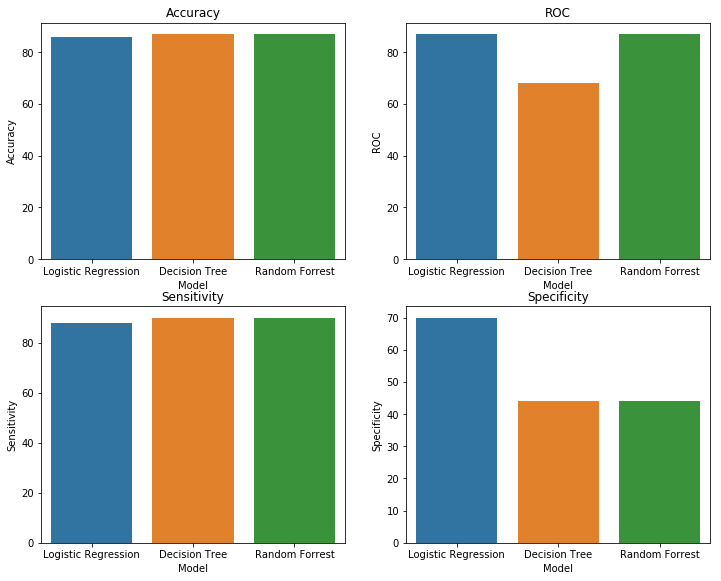

In [166]:
#plot the comparison graphs for all the 3 models 
plt.figure(figsize=(12,20))

for i in range(0,4):
    plt.subplot(4,2,i+1)
    plt.title(Model_eval_df.columns[i+1])
    sns.barplot(x = 'Model', y = Model_eval_df.columns[i+1], data = Model_eval_df)

#### Conclusion: Although Accuracy and Sensitivity is almost same for all the 3 models . ROC score of Decision tree is less and Specificity of the logistic regression is more. Since Random forrest fulfills the gap of 